#### Loading Libraries for this Analysis


In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [48]:
#Reading Files

data=pd.read_csv(r'C:\Users\luise\OneDrive\Documentos\GitHub\Google_Store_Analysis\googleplaystore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [50]:
#Dealing with missing values
total=data.isna().sum().sort_values(ascending=False)
percent=(data.isna().sum()/data.isna().sum().sum())
missing_data=pd.concat((total,percent),axis=1,keys={'Missing','Percent'})
print(missing_data)

                Missing   Percent
Rating             1474  0.991258
Current Ver           8  0.005380
Android Ver           3  0.002017
Type                  1  0.000672
Content Rating        1  0.000672
App                   0  0.000000
Category              0  0.000000
Reviews               0  0.000000
Size                  0  0.000000
Installs              0  0.000000
Price                 0  0.000000
Genres                0  0.000000
Last Updated          0  0.000000


In [51]:
#Get rid of missing ratings since it won't use our purpose.

data.dropna(how='any',inplace=True)
print(data.shape)


(9360, 13)


After remove missing data,our data contain 9,360 records with 13 fields

In [52]:
data.Rating.describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

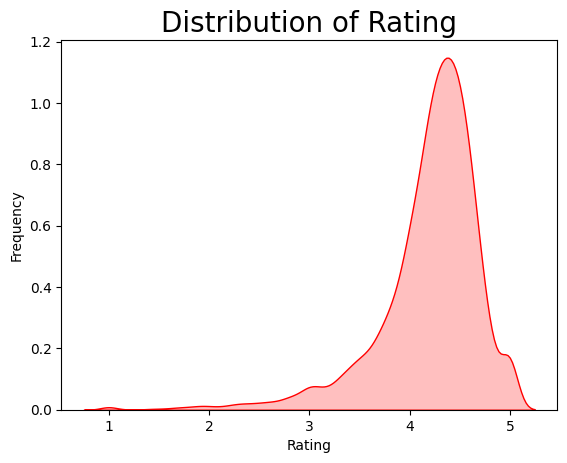

In [53]:
g = sns.kdeplot(data.Rating, color="Red", fill = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)
rating_mean=data.Rating.mean()




In [54]:
print('The mean for the rating is:',rating_mean)

The mean for the rating is: 4.191837606837606


In [55]:

print(len(data['Category'].unique()),'categories')

33 categories


In [56]:
data['Category'].value_counts()

FAMILY                 1746
GAME                   1097
TOOLS                   733
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
LIFESTYLE               314
PERSONALIZATION         312
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

Text(0.5, 1.0, 'Count of app in each category')

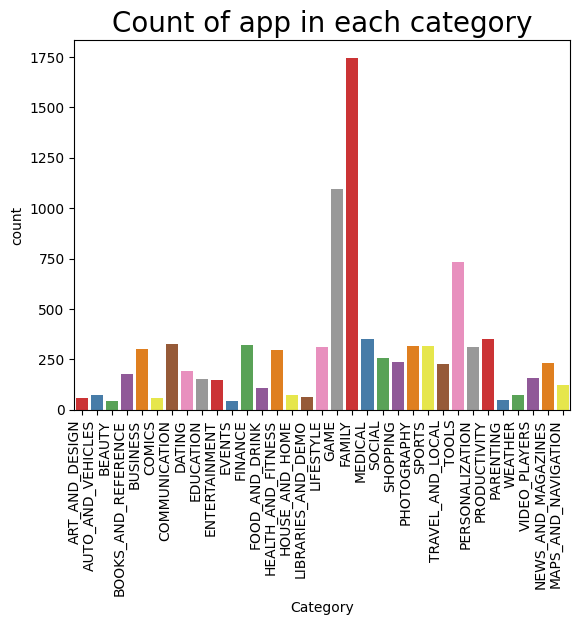

In [57]:
g = sns.countplot(x="Category",data=data, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90,ha='right')
g 
plt.title('Count of app in each category',size = 20)

### Finding
We can see that Game and Family categories have the most appearances for application in store

Text(0.5, 1.0, 'Boxplot of Rating VS Category')

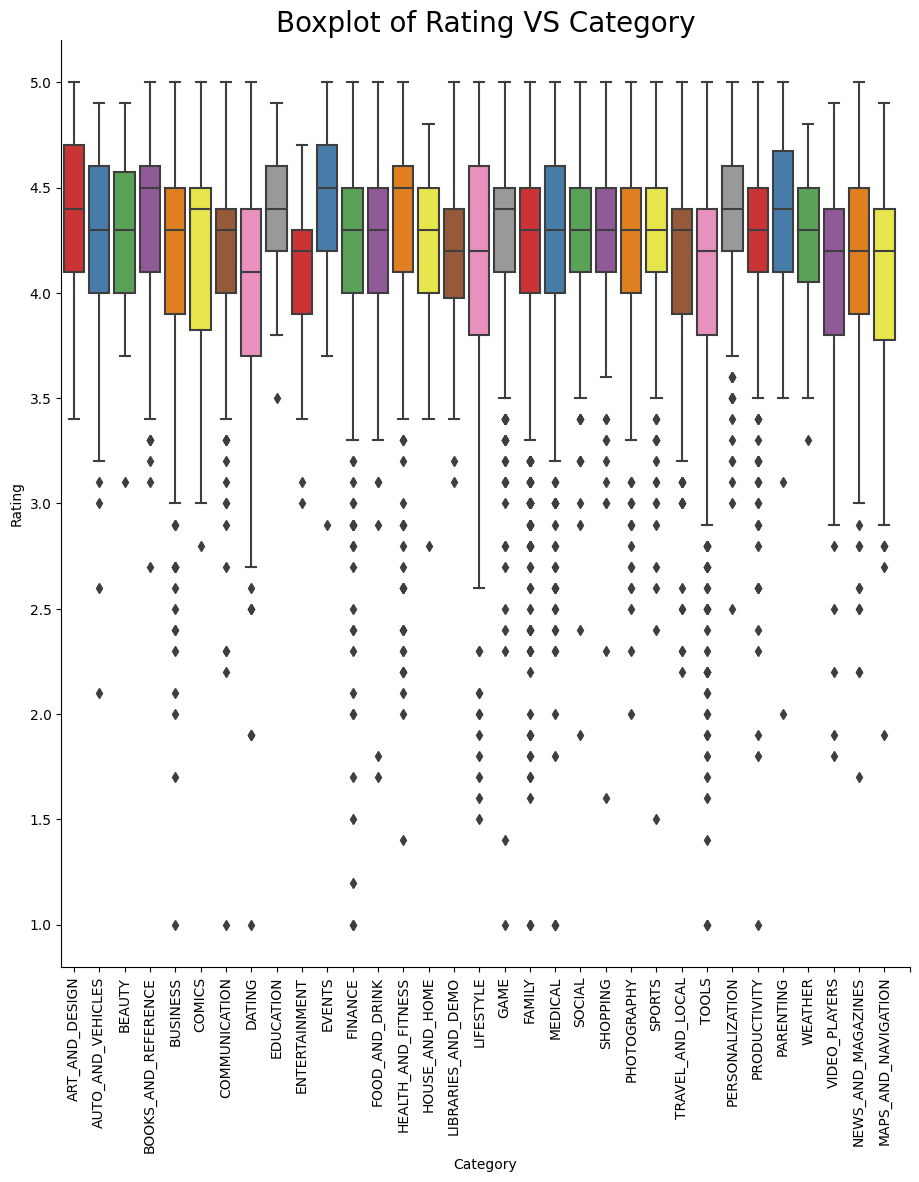

In [58]:
g = sns.catplot(x="Category",y="Rating",data=data, kind="box", height = 10 ,
palette = "Set1")
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Rating")
plt.title('Boxplot of Rating VS Category',size = 20)

Rating of each cateogry are alike.

### Reviews

In [59]:
data.Reviews.head()

#This data still an object we need to convert to int64

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

In [60]:
data.Reviews=pd.to_numeric(data.Reviews)

In [61]:
data.Reviews.head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: int64

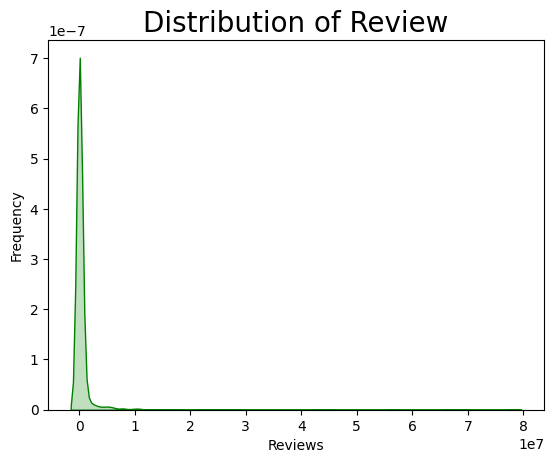

In [62]:
g = sns.kdeplot(data.Reviews, color="Green", fill = True)
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
plt.title('Distribution of Review',size = 20)
rating_mean=data.Rating.mean()

Most of application in this store have less than 1M in reviews. Obviously, well-known applictions have a lot of reviews

Text(0.5, 1.0, 'Rating VS Reveiws')

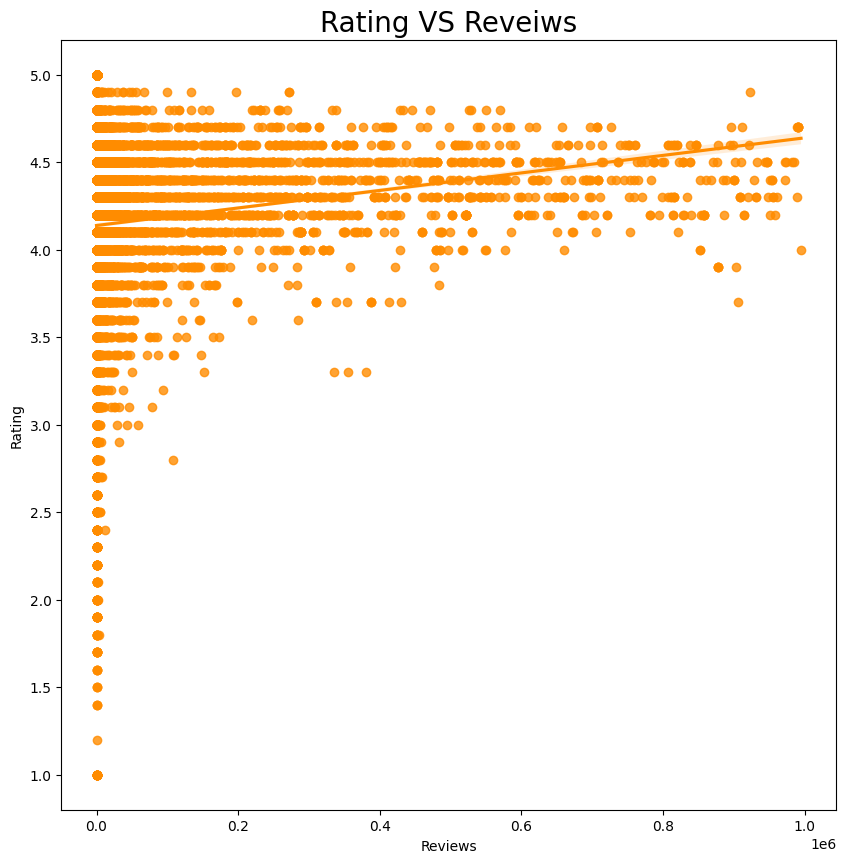

In [63]:
plt.figure(figsize = (10,10))
sns.regplot(x="Reviews", y="Rating", color = 'darkorange',data=data[data['Reviews']<1000000]);
plt.title('Rating VS Reveiws',size = 20)

Seems like well-known application will get a good rating

### Size

In [64]:
data['Size'].head()
#We can see that this column is an object type and contain the metric symbol for the perefix,

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [65]:
len(data[data.Size == 'Varies with device'])

1637

In [66]:
data['Size'].replace('Varies with device', np.nan, inplace = True ) 

In [67]:
#Changing K or M for 1000 or a million.

data.Size = (data.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             data.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))

In [68]:
#fill "Varies with device" with mean of size in each category

data['Size'].fillna(data.groupby('Category')['Size'].transform('mean'),inplace = True)

### Installs

In [69]:
#Data still in object type, and contain the plus sign
data['Installs'].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

#### NOTE
I encode it by order of size;
ex: 
* 0 refer to 1+
* 1 refer to 5+
* 2 refer  to 10+
* ETC.

In [70]:
data.Installs = data.Installs.apply(lambda x: x.replace(',',''))
data.Installs = data.Installs.apply(lambda x: x.replace('+',''))
data.Installs = data.Installs.apply(lambda x: int(x))

In [71]:
data['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1], dtype=int64)

In [72]:
Sorted_value = sorted(list(data['Installs'].unique()))

In [73]:
data['Installs'].replace(Sorted_value,range(0,len(Sorted_value),1), inplace = True )

In [74]:
data['Installs'].head()

0     8
1    11
2    13
3    15
4    10
Name: Installs, dtype: int64

Text(0.5, 1.0, 'Rating VS Installs')

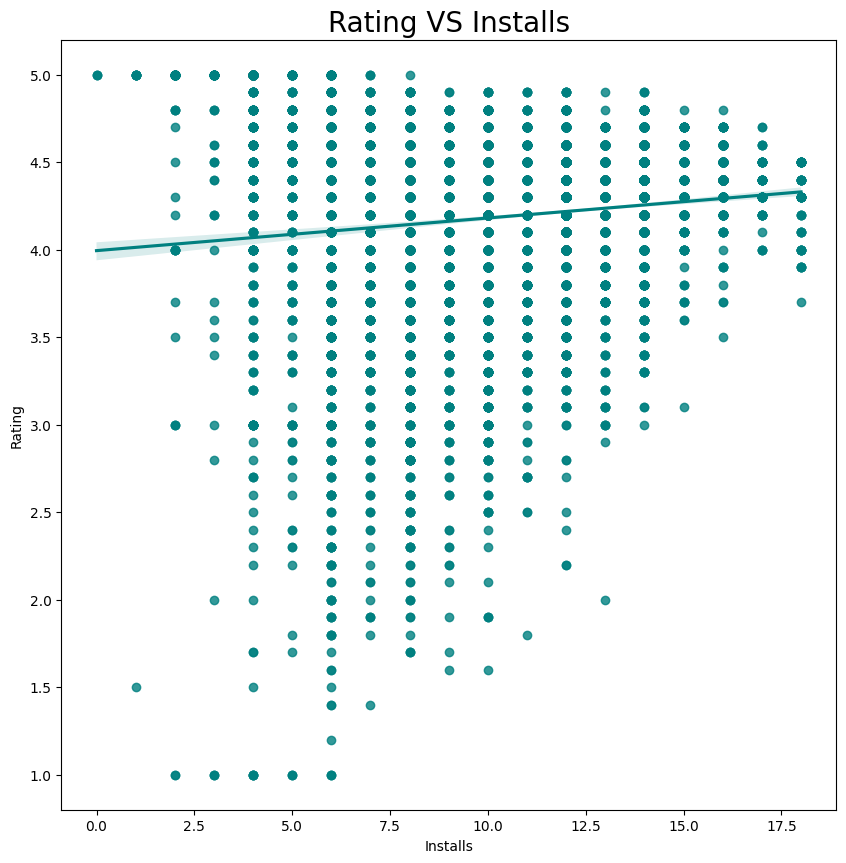

In [75]:
plt.figure(figsize = (10,10))
sns.regplot(x="Installs", y="Rating", color = 'teal',data=data);
plt.title('Rating VS Installs',size = 20)

### Type

In [76]:
data['Type'].unique()

array(['Free', 'Paid'], dtype=object)

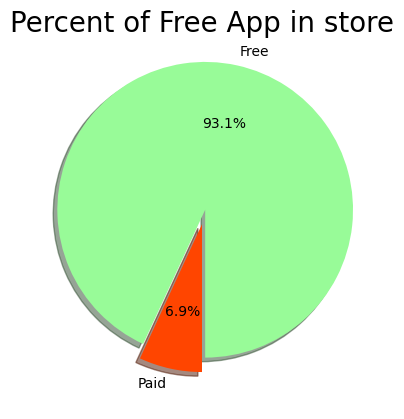

In [77]:
# Data to plot
labels =data['Type'].value_counts(sort = True).index
sizes = data['Type'].value_counts(sort = True)


colors = ["palegreen","orangered"]
explode = (0.1,0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of Free App in store',size = 20)
plt.show()

Most of application in this store are free (93.1%)

Because string can't enter to model, I need to change format a little bit

In [78]:
data['Free'] = data['Type'].map(lambda s :1  if s =='Free' else 0)
data.drop(['Type'], axis=1, inplace=True)

Price

In [79]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [80]:
#Replace the symbol $ and change the datatype to float

data.Price = data.Price.apply(lambda x: x.replace('$',''))
data['Price'] = data['Price'].apply(lambda x: float(x))

In [81]:
data['Price'].describe()

count    9360.000000
mean        0.961279
std        15.821640
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

Average of price is around 0.96, but most of them are free (8715 from 9360).
The most expensive app is 400 dollar !!!. Totally an outlier.

In [82]:
data[data['Price'] == 400]

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Free
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,8,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,0


Text(0.5, 1.0, 'Scatter plot Rating VS Price')

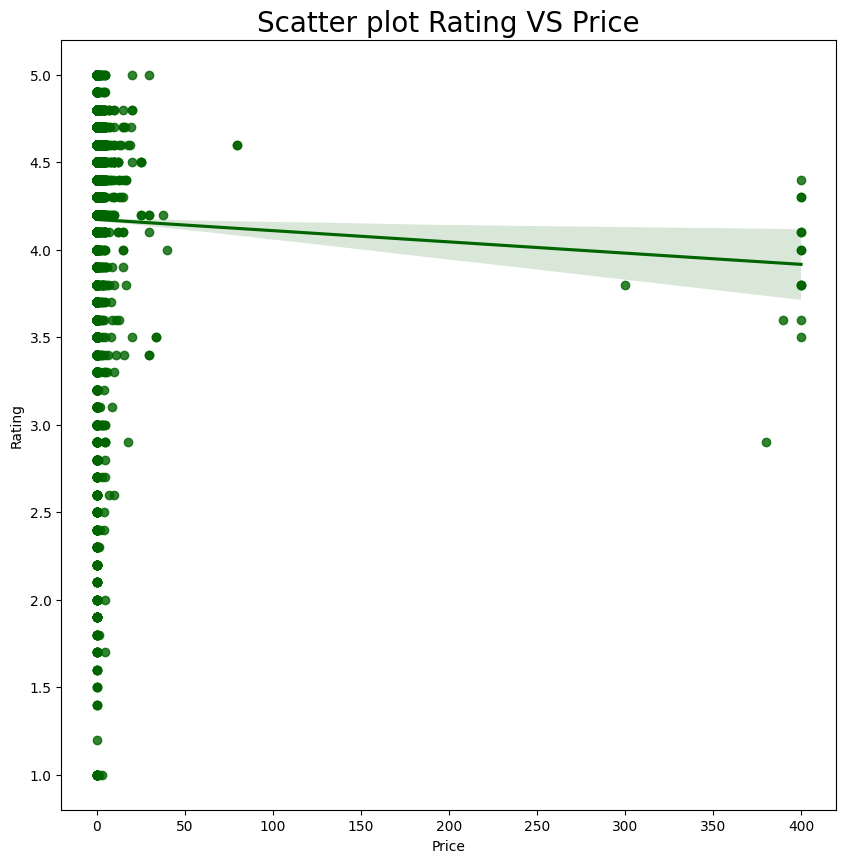

In [83]:
plt.figure(figsize = (10,10))
sns.regplot(x="Price", y="Rating", color = 'darkgreen',data=data[data['Reviews']<1000000]);
plt.title('Scatter plot Rating VS Price',size = 20)

In [84]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Free'],
      dtype='object')

In [85]:
#Creating Bins for plot.

data.loc[ data['Price'] == 0, 'PriceBand'] = '0 Free'
data.loc[(data['Price'] > 0) & (data['Price'] <= 0.99), 'PriceBand'] = '1 cheap'
data.loc[(data['Price'] > 0.99) & (data['Price'] <= 2.99), 'PriceBand']   = '2 not cheap'
data.loc[(data['Price'] > 2.99) & (data['Price'] <= 4.99), 'PriceBand']   = '3 normal'
data.loc[(data['Price'] > 4.99) & (data['Price'] <= 14.99), 'PriceBand']   = '4 expensive'
data.loc[(data['Price'] > 14.99) & (data['Price'] <= 29.99), 'PriceBand']   = '5 too expensive'
data.loc[(data['Price'] > 29.99), 'PriceBand']  = '6 FXXXing expensive'

In [86]:
data[['PriceBand', 'Rating']].groupby(['PriceBand'], as_index=False).mean()

,PriceBand,Rating
0,0 Free,4.186288
1,1 cheap,4.300943
2,2 not cheap,4.292975
3,3 normal,4.250318
4,4 expensive,4.269149
5,5 too expensive,4.252000
6,6 FXXXing expensive,3.923810


Text(0.5, 1.0, 'Boxen plot Rating VS PriceBand')

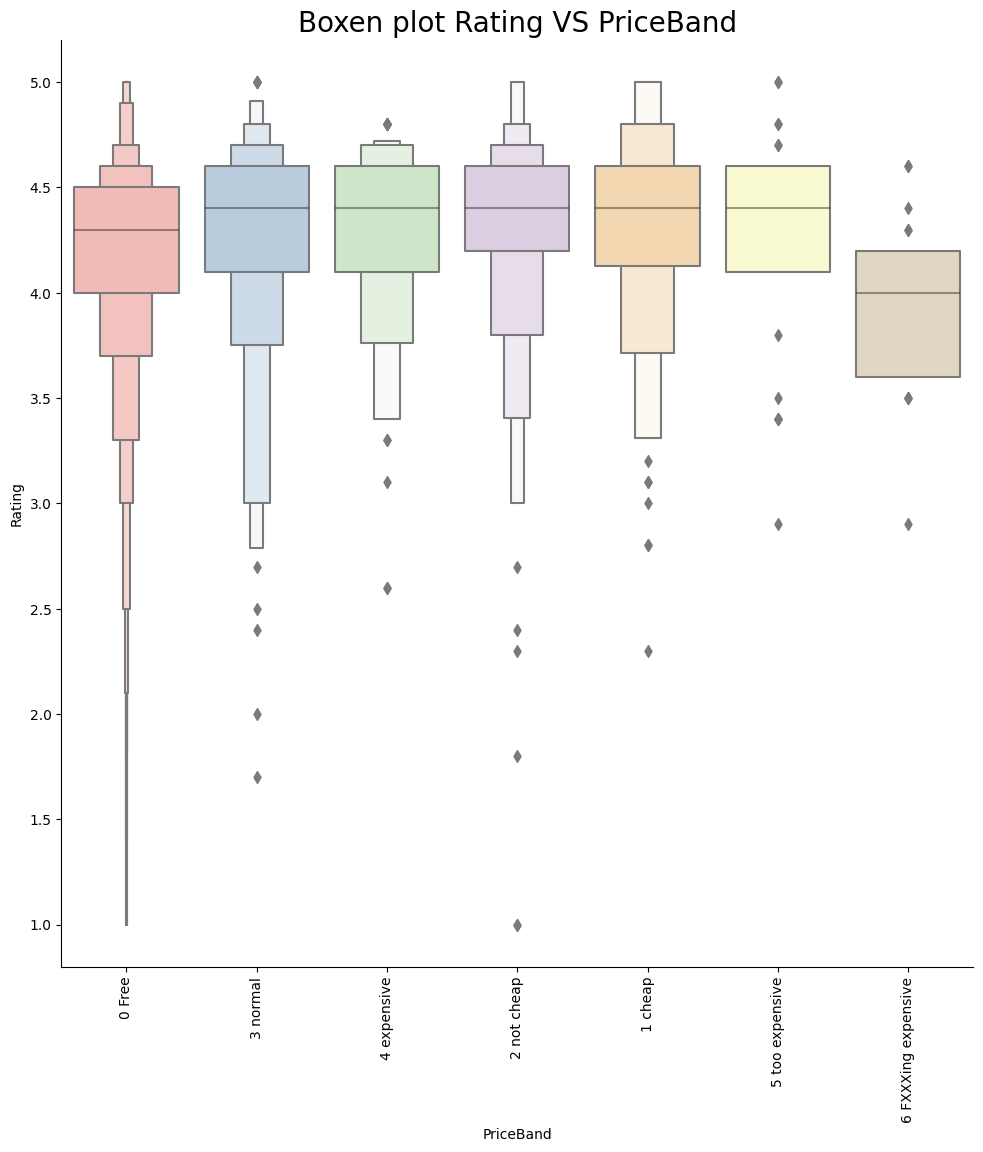

In [92]:
g = sns.catplot(x="PriceBand",y="Rating",data=data, kind="boxen", height = 10 ,palette = "Pastel1")
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Boxen plot Rating VS PriceBand',size = 20)

After 30 dollars the rating mean decreased , despite it didn't change in lower prices.Then its fine to charge for your app but no too much.

Content Rating

In [93]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

Text(0.5, 1.0, 'Box plot Rating VS Content Rating')

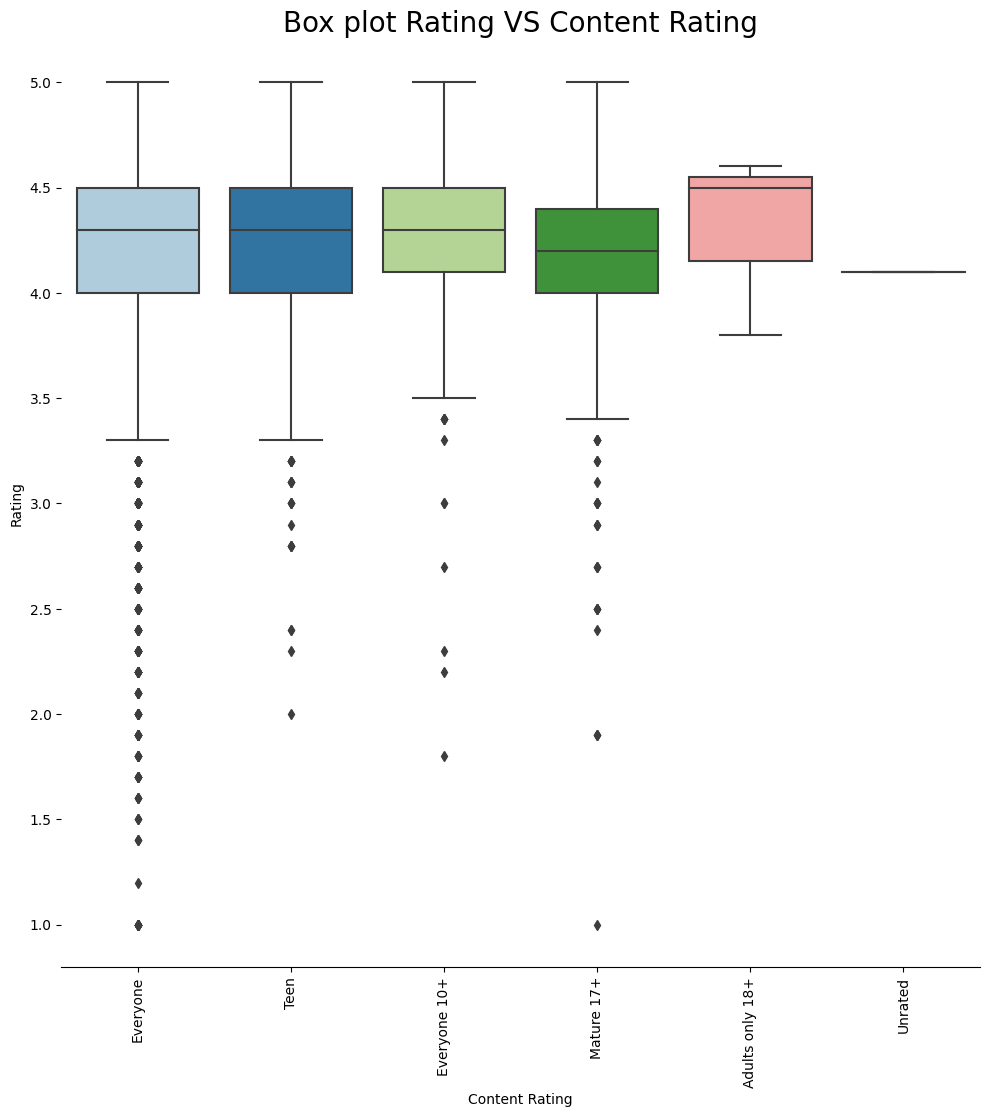

In [96]:
g = sns.catplot(x="Content Rating",y="Rating",data=data, kind="box", height = 10 ,palette = "Paired")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Box plot Rating VS Content Rating',size = 20)

In [97]:
data[data['Content Rating']=='Unrated']

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Free,PriceBand
8266,DC Universe Online Map,TOOLS,4.1,1186,6400000.0,9,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up,1,0 Free


In [98]:
#I decided to drop 'Unrated' rating because it contain only 1 record
data = data[data['Content Rating'] != 'Unrated']

Text(0.5, 1.0, 'Box plot Rating VS Content Rating')

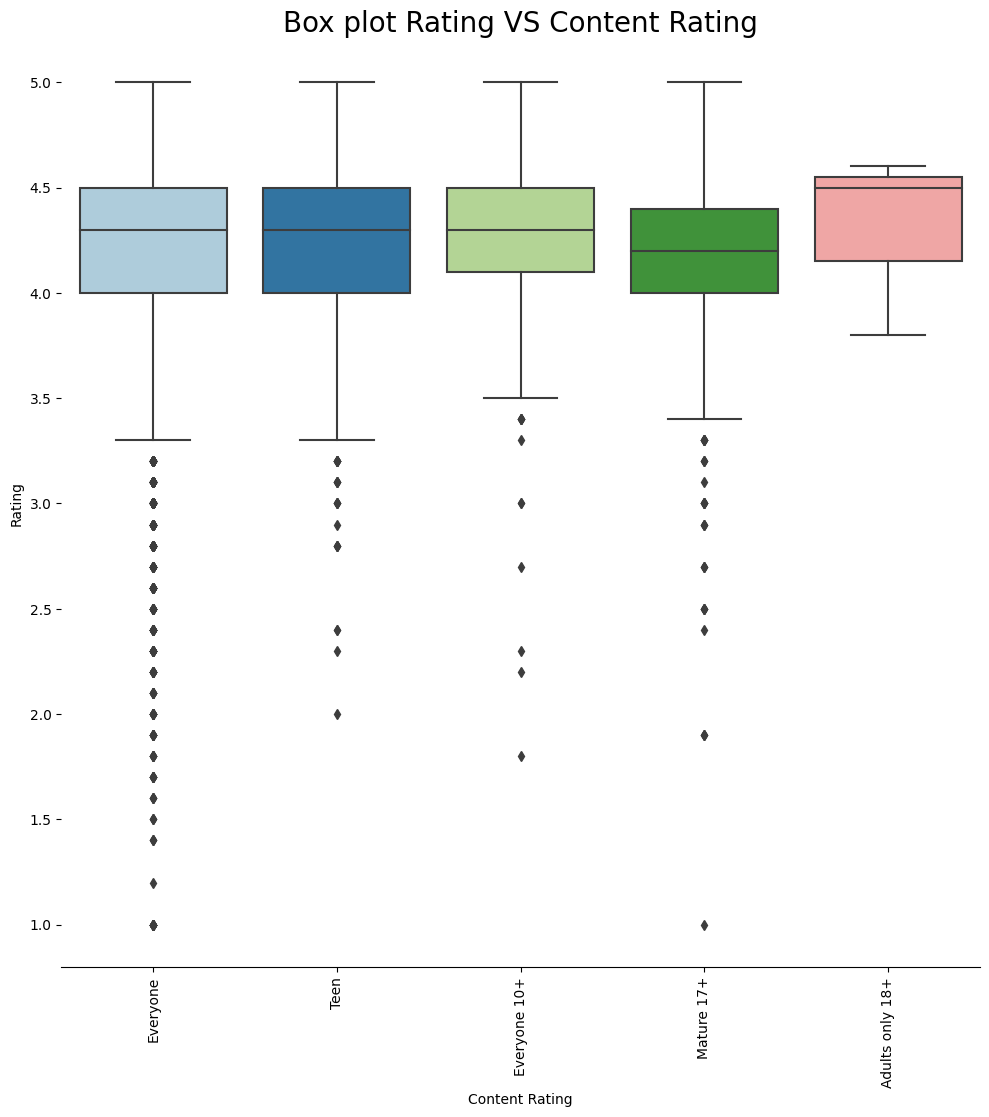

In [99]:
g = sns.catplot(x="Content Rating",y="Rating",data=data, kind="box", height = 10 ,palette = "Paired")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Box plot Rating VS Content Rating',size = 20)

Genres

In [100]:
print( len(data['Genres'].unique()) , "genres")

print("\n", data['Genres'].unique())

115 genres

 ['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business' 'Comics'
 'Comics;Creativity' 'Communication' 'Dating' 'Education;Education'
 'Education' 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music & Video'
 'Entertainment;Brain Games' 'Entertainment;Creativity' 'Events' 'Finance'
 'Food & Drink' 'Health & Fitness' 'House & Home' 'Libraries & Demo'
 'Lifestyle' 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure'
 'Arcade' 'Casual' 'Card' 'Casual;Pretend Play' 'Action' 'Strategy'
 'Puzzle' 'Sports' 'Music' 'Word' 'Racing' 'Casual;Creativity'
 'Casual;Action & Adventure' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Creativity' 'Puzzle;Brain Games' 'Educati

In [103]:
data.Genres.value_counts().tail(20)

Music & Audio;Music & Video            1
Communication;Creativity               1
Racing;Pretend Play                    1
Strategy;Education                     1
Role Playing;Brain Games               1
Puzzle;Education                       1
Lifestyle;Education                    1
Adventure;Brain Games                  1
Comics;Creativity                      1
Arcade;Pretend Play                    1
Health & Fitness;Action & Adventure    1
Health & Fitness;Education             1
Travel & Local;Action & Adventure      1
Board;Pretend Play                     1
Lifestyle;Pretend Play                 1
Parenting;Brain Games                  1
Card;Brain Games                       1
Tools;Education                        1
Entertainment;Education                1
Strategy;Creativity                    1
Name: Genres, dtype: int64

Many genre contain only few record, it may make a bias.
Then, I decide to group it to bigger genre by ignore sub-genre (after " ; " sign)

In [104]:
data['Genres'] = data['Genres'].str.split(';').str[0]

Group Music & Audio  as  Music

In [105]:
data['Genres'].replace('Music & Audio', 'Music',inplace = True)

In [108]:
data[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean().describe()

,Rating
count,47.000000
mean,4.210662
std,0.104405
min,3.970769
25%,4.132039
50%,4.198246
75%,4.282529
max,4.435556


Observing from Standard Deviation, seem like genre is not effect too much to rating.
The lowest of an average rating on genres (Dating) is 3.97 
while the highest (Events) is 4.43